Visualizing my step data, from a Garmin [vívofit](https://buy.garmin.com/en-US/US/p/143405) (until about May 2016),  a [Forerunner 235](https://buy.garmin.com/en-US/US/p/529988) (May 2016 - June 2019) and a [Forerunner 935](https://buy.garmin.com/en-US/US/p/564291) (since June 2019).
The data has been recorded to the [Apples Health](https://www.apple.com/ios/health/) app by [Garmin Connect](https://connect.garmin.com/).
I exported the data from Apple Health to a [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) file with the [QS Access](http://quantifiedself.com/qs-access-app/) app.

In [1]:
# Load some modules we need
import pandas  # for data manipulation
import matplotlib.pylab as plt  # for plotting
import seaborn  # for plot styling
import dateutil.relativedelta  # for date calculations
import calendar  # for easy day and month names in the tick labels

In [2]:
# Set some defaults
seaborn.set_style('dark')
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [3]:
# Read in data
data = pandas.read_csv('steps.csv')

In [4]:
# How does it look like?
data.head()

,Start,Finish,Steps (count)
0,11-Nov-2014 00:00,12-Nov-2014 00:00,38.0
1,12-Nov-2014 00:00,13-Nov-2014 00:00,9122.0
2,13-Nov-2014 00:00,14-Nov-2014 00:00,9327.0
3,14-Nov-2014 00:00,15-Nov-2014 00:00,10588.0
4,15-Nov-2014 00:00,16-Nov-2014 00:00,7493.0


In [5]:
data.tail()

,Start,Finish,Steps (count)
2616,09-Jan-2022 00:00,10-Jan-2022 00:00,7000.0
2617,10-Jan-2022 00:00,11-Jan-2022 00:00,6775.0
2618,11-Jan-2022 00:00,12-Jan-2022 00:00,5979.0
2619,12-Jan-2022 00:00,13-Jan-2022 00:00,10197.0
2620,13-Jan-2022 00:00,14-Jan-2022 00:00,5318.0


In [6]:
# Massage data
data.rename(columns={'Start': 'Date'}, inplace=True)
data.rename(columns={'Steps (count)': 'Steps'}, inplace=True)
data.Steps = data.Steps.astype(int)
data.drop('Finish', axis=1, inplace=True)

In [7]:
# How doed it look now?
data.head()

,Date,Steps
0,11-Nov-2014 00:00,38
1,12-Nov-2014 00:00,9122
2,13-Nov-2014 00:00,9327
3,14-Nov-2014 00:00,10588
4,15-Nov-2014 00:00,7493


In [8]:
data.tail()

,Date,Steps
2616,09-Jan-2022 00:00,7000
2617,10-Jan-2022 00:00,6775
2618,11-Jan-2022 00:00,5979
2619,12-Jan-2022 00:00,10197
2620,13-Jan-2022 00:00,5318


In [9]:
# Make us a proper date column, based on https://stackoverflow.com/a/26763793
data['Date'] = pandas.to_datetime(data['Date'])

In [10]:
# Make us a year, month and weekday colum, based on https://stackoverflow.com/q/48623332
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Weekday'] = data.Date.dt.dayofweek

In [11]:
# How doed it look now?
data.head()

,Date,Steps,Year,Month,Day,Weekday
0,2014-11-11,38,2014,11,11,1
1,2014-11-12,9122,2014,11,12,2
2,2014-11-13,9327,2014,11,13,3
3,2014-11-14,10588,2014,11,14,4
4,2014-11-15,7493,2014,11,15,5


In [12]:
yearwelookat = 2021

In [13]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
print('In %s I made a total of %0.2f Million steps' % (yearwelookat,
                                                       data[(data.Year == yearwelookat)]['Steps'].sum() * 1e-6))

In 2021 I made a total of 4.40 Million steps


In [14]:
if calendar.isleap(yearwelookat):
    dpy = 366
else:
    dpy = 365

In [15]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
print('In %s I made %s steps per day' % (yearwelookat,
                                         int(round(data[(data.Year == yearwelookat)]['Steps'].sum() / dpy))))

In 2021 I made 12045 steps per day


In [16]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
# In Garmin connect, go go 'Reports' in the sidebar, then 'Health & Fitness' > 'Steps'¨
# You can also try to mangle the export of *all* the Garmin data you get from 'Export your Data' here: https://www.garmin.com/en-US/account/datamanagement/
for month in sorted(data.Date.dt.month.unique()):
    print('In %s %s I made a total of %s steps' % (calendar.month_name[month],
                                                   yearwelookat,
                                                   data[(data.Year == yearwelookat) &
                                                        (data.Month == month)]['Steps'].sum()))

In January 2021 I made a total of 308158 steps
In February 2021 I made a total of 327768 steps
In March 2021 I made a total of 373049 steps
In April 2021 I made a total of 368005 steps
In May 2021 I made a total of 368638 steps
In June 2021 I made a total of 378960 steps
In July 2021 I made a total of 382311 steps
In August 2021 I made a total of 412844 steps
In September 2021 I made a total of 384229 steps
In October 2021 I made a total of 363815 steps
In November 2021 I made a total of 358385 steps
In December 2021 I made a total of 370252 steps


In [17]:
# When were the five highest step counts?
data[data.Year == yearwelookat].sort_values('Steps', ascending=False).head()

,Date,Steps,Year,Month,Day,Weekday
2370,2021-05-08,22398,2021,5,8,5
2377,2021-05-15,21159,2021,5,15,5
2448,2021-07-25,21004,2021,7,25,6
2299,2021-02-26,20874,2021,2,26,4
2352,2021-04-20,19892,2021,4,20,1


In [18]:
# When were the five lowest step counts?
data[data.Year == yearwelookat].sort_values('Steps').head()

,Date,Steps,Year,Month,Day,Weekday
2260,2021-01-18,4458,2021,1,18,0
2588,2021-12-12,4459,2021,12,12,6
2597,2021-12-21,4481,2021,12,21,1
2254,2021-01-12,4727,2021,1,12,1
2302,2021-03-01,5504,2021,3,1,0


In [19]:
# Generate us a nice plot title, with help from https://stackoverflow.com/a/32083946/323100
Duration = dateutil.relativedelta.relativedelta(data[data.Year == yearwelookat].Date.max(),
                                                data[data.Year == yearwelookat].Date.min())

In [20]:
# Generate us some nice tick labels
Ticklabels_weekday = ['%s\n~%g steps' % (d, round(s / 1e3, 1) * 1e3)
                      for (s, d) in zip(data[data.Year == yearwelookat].groupby('Weekday').Steps.mean(),
                                        list(calendar.day_name))]
# Generate us some nice tick labels
Ticklabels_month = ['%s\n~%g steps' % (m, round(s / 1e3, 1) * 1e3)
                    for (s, m) in zip(data[data.Year == yearwelookat].groupby('Month').Steps.mean(),
                                      list(calendar.month_name[1:]))]
# Generate us some nice tick labels
Ticklabels_year = ['%s\n~%g steps' % (y, round(s / 1e3, 1) * 1e3)
                   for (s, y) in zip(data[data.Year == yearwelookat].groupby('Year').Steps.mean(),
                                     data[data.Year == yearwelookat].Year.unique())]

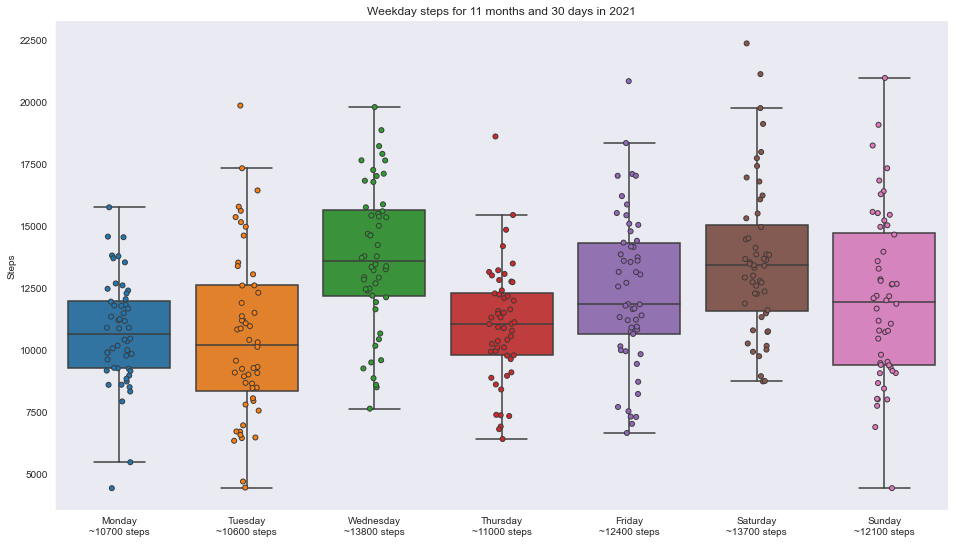

In [21]:
# Plot the steps per weekday
seaborn.boxplot(data=data[data.Year == yearwelookat],
                x='Weekday',
                y='Steps',
                fliersize=0)
seaborn.stripplot(data=data[data.Year == yearwelookat],
                  x='Weekday',
                  y='Steps',
                  jitter=True,
                  linewidth=1)
plt.gca().set_xticklabels(Ticklabels_weekday)
plt.title('Weekday steps for %s months and %s days in %s' % (Duration.months,
                                                             Duration.days,
                                                             yearwelookat))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()

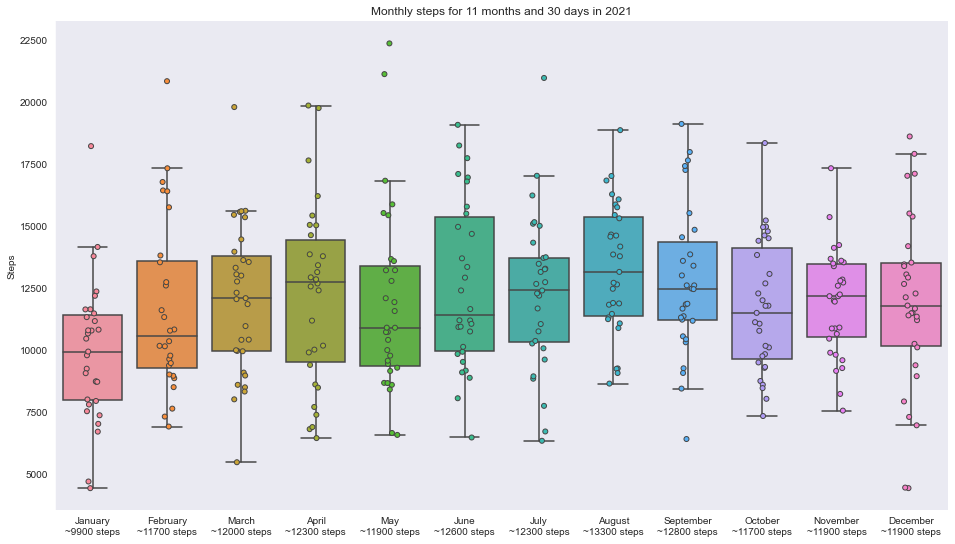

In [22]:
# Plot the steps per month
seaborn.boxplot(data=data[data.Year == yearwelookat],
                x='Month',
                y='Steps',
                fliersize=0)
seaborn.stripplot(data=data[data.Year == yearwelookat],
                  x='Month',
                  y='Steps',
                  jitter=True,
                  linewidth=1)
plt.gca().set_xticklabels(Ticklabels_month)
plt.title('Monthly steps for %s months and %s days in %s' % (Duration.months,
                                                             Duration.days,
                                                             yearwelookat))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()